In [17]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [3]:
price('LTC', exchange='Coinbase')

{'USD': 57.62}

In [4]:
price('NEO', ['BTC', 'ETH', 'USD'])

{'BTC': 0.002763, 'ETH': 0.06518, 'USD': 18.51}

In [5]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [8]:
df = daily_price_historical('BTC', 'USD')
print('Max length = {}'.format(len(df)))
print('Max time = {}'.format(df.timestamp.max() - df.timestamp.min()))
df.head()

Max length = 2959
Max time = 2958 days 00:00:00


,close,high,low,open,time,volumefrom,volumeto,timestamp
0,0.04951,0.04951,0.04951,0.04951,1279324800,20.00,0.9902,2010-07-17 08:00:00
1,0.08584,0.08585,0.05941,0.04951,1279411200,75.01,5.0900,2010-07-18 08:00:00
2,0.08080,0.09307,0.07723,0.08584,1279497600,574.00,49.6600,2010-07-19 08:00:00
3,0.07474,0.08181,0.07426,0.08080,1279584000,262.00,20.5900,2010-07-20 08:00:00
4,0.07921,0.07921,0.06634,0.07474,1279670400,575.00,42.2600,2010-07-21 08:00:00


In [11]:
df.iloc[-5:]

,close,high,low,open,time,volumefrom,volumeto,timestamp
2954,6405.71,6622.16,6322.44,6591.18,1534550400,52093.80,3.367443e+08,2018-08-18 08:00:00
2955,6502.18,6560.88,6330.56,6405.74,1534636800,39452.94,2.539848e+08,2018-08-19 08:00:00
2956,6269.90,6537.54,6248.39,6502.24,1534723200,61983.28,3.979813e+08,2018-08-20 08:00:00
2957,6491.11,6506.69,6259.81,6270.09,1534809600,61753.86,3.967461e+08,2018-08-21 08:00:00
2958,6705.35,6890.79,6453.41,6491.09,1534896000,39303.35,2.653217e+08,2018-08-22 08:00:00


In [12]:
def hourly_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [16]:
time_delta = 1
df = hourly_price_historical('BTC', 'USD', 9999, time_delta)
df.head()
print('Max length = {}'.format(len(df)))
print('Max time = {}'.format(df.timestamp.max() - df.timestamp.min()))

Max length = 2001
Max time = 83 days 08:00:00


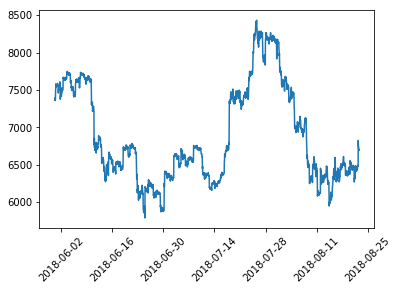

In [15]:
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()